In [1]:
from tqdm import tqdm
from sklearn.model_selection import LeaveOneOut
from IPython.utils import io
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Activation

In [2]:
features = pd.read_csv('Dataset/gastrointestinal_colonoscopy_lesions_dataset.csv')
features = features.T
class_label = pd.Series(features.index)
features.index = range(features.shape[0])
classes = np.zeros((features.shape[0], 3))
for i in range(classes.shape[0]):
    if 'adenoma' in class_label[i]:
        classes[i,0] = 1.0
        class_label[i] = 0
    elif 'serrated' in class_label[i]:
        classes[i,2] = 1.0
        class_label[i] = 2
    else:
        classes[i,1] = 1.0
        class_label[i] = 1
classes = {'adenoma': classes[:,0], 'hyperplasic': classes[:,1], 'serrated': classes[:,2]}
classes = pd.DataFrame(classes)
class_label = class_label.astype('int')

In [3]:
for col in features.columns:
    if features[col].abs().max()==0:
        continue
    features[col] = (features[col] - features[col].mean())/features[col].abs().max()

In [4]:
model = Sequential([
    
    InputLayer(input_shape=(features.shape[1])),
    
    Dense(7, activation='sigmoid'),
    
    Dense(5, activation='sigmoid'),
    
    Dense(3, activation='relu')
])

model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
             )
model.summary()
model.save_weights('model_weights/initial_weights_colonoscopy')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 4907      
                                                                 
 dense_1 (Dense)             (None, 5)                 40        
                                                                 
 dense_2 (Dense)             (None, 3)                 18        
                                                                 
Total params: 4,965
Trainable params: 4,965
Non-trainable params: 0
_________________________________________________________________


In [ ]:
acc = 0
j = 0
for train_index, test_index in LeaveOneOut().split(features):
    x_train, x_test = features.iloc[train_index,:], features.iloc[test_index,:]
    y_train, y_test = classes.iloc[train_index,:], classes.iloc[test_index,:]
    model.load_weights('model_weights/initial_weights_colonoscopy')
    with io.capture_output() as captured:
        model.fit(x_train, y_train, epochs=500)
    acc += model.evaluate(x_test, y_test)[1]
    j+=1

In [ ]:
acc/j

In [6]:
model.fit(features, classes, epochs=500)

Epoch 1/500
5/5 [==============================] - 0s 2ms/step - loss: 0.3697 - accuracy: 0.7039
Epoch 2/500
5/5 [==============================] - 0s 3ms/step - loss: 0.3691 - accuracy: 0.7039
Epoch 3/500
5/5 [==============================] - 0s 3ms/step - loss: 0.3687 - accuracy: 0.7039
Epoch 4/500
5/5 [==============================] - 0s 3ms/step - loss: 0.3681 - accuracy: 0.7039
Epoch 5/500
5/5 [==============================] - 0s 3ms/step - loss: 0.3677 - accuracy: 0.7039
Epoch 6/500
5/5 [==============================] - 0s 3ms/step - loss: 0.3671 - accuracy: 0.7039
Epoch 7/500
5/5 [==============================] - 0s 3ms/step - loss: 0.3667 - accuracy: 0.7039
Epoch 8/500
5/5 [==============================] - 0s 3ms/step - loss: 0.3661 - accuracy: 0.7039
Epoch 9/500
5/5 [==============================] - 0s 3ms/step - loss: 0.3657 - accuracy: 0.7039
Epoch 10/500
5/5 [==============================] - 0s 3ms/step - loss: 0.3653 - accuracy: 0.7039
Epoch 11/500
5/5 [===========

5/5 [==============================] - 0s 2ms/step - loss: 0.3263 - accuracy: 0.7303
Epoch 85/500
5/5 [==============================] - 0s 3ms/step - loss: 0.3257 - accuracy: 0.7303
Epoch 86/500
5/5 [==============================] - 0s 3ms/step - loss: 0.3251 - accuracy: 0.7303
Epoch 87/500
5/5 [==============================] - 0s 2ms/step - loss: 0.3245 - accuracy: 0.7303
Epoch 88/500
5/5 [==============================] - 0s 3ms/step - loss: 0.3239 - accuracy: 0.7303
Epoch 89/500
5/5 [==============================] - 0s 2ms/step - loss: 0.3234 - accuracy: 0.7303
Epoch 90/500
5/5 [==============================] - 0s 2ms/step - loss: 0.3228 - accuracy: 0.7303
Epoch 91/500
5/5 [==============================] - 0s 2ms/step - loss: 0.3222 - accuracy: 0.7303
Epoch 92/500
5/5 [==============================] - 0s 3ms/step - loss: 0.3216 - accuracy: 0.7303
Epoch 93/500
5/5 [==============================] - 0s 2ms/step - loss: 0.3210 - accuracy: 0.7303
Epoch 94/500
5/5 [===============

5/5 [==============================] - 0s 3ms/step - loss: 0.2668 - accuracy: 0.8289
Epoch 168/500
5/5 [==============================] - 0s 3ms/step - loss: 0.2658 - accuracy: 0.8355
Epoch 169/500
5/5 [==============================] - 0s 2ms/step - loss: 0.2650 - accuracy: 0.8355
Epoch 170/500
5/5 [==============================] - 0s 2ms/step - loss: 0.2641 - accuracy: 0.8355
Epoch 171/500
5/5 [==============================] - 0s 2ms/step - loss: 0.2632 - accuracy: 0.8355
Epoch 172/500
5/5 [==============================] - 0s 2ms/step - loss: 0.2622 - accuracy: 0.8355
Epoch 173/500
5/5 [==============================] - 0s 3ms/step - loss: 0.2613 - accuracy: 0.8355
Epoch 174/500
5/5 [==============================] - 0s 3ms/step - loss: 0.2604 - accuracy: 0.8421
Epoch 175/500
5/5 [==============================] - 0s 2ms/step - loss: 0.2595 - accuracy: 0.8421
Epoch 176/500
5/5 [==============================] - 0s 3ms/step - loss: 0.2586 - accuracy: 0.8421
Epoch 177/500
5/5 [=====

5/5 [==============================] - 0s 2ms/step - loss: 0.1804 - accuracy: 0.9211
Epoch 250/500
5/5 [==============================] - 0s 2ms/step - loss: 0.1793 - accuracy: 0.9211
Epoch 251/500
5/5 [==============================] - 0s 3ms/step - loss: 0.1781 - accuracy: 0.9211
Epoch 252/500
5/5 [==============================] - 0s 3ms/step - loss: 0.1770 - accuracy: 0.9211
Epoch 253/500
5/5 [==============================] - 0s 3ms/step - loss: 0.1759 - accuracy: 0.9211
Epoch 254/500
5/5 [==============================] - 0s 2ms/step - loss: 0.1748 - accuracy: 0.9145
Epoch 255/500
5/5 [==============================] - 0s 2ms/step - loss: 0.1737 - accuracy: 0.9211
Epoch 256/500
5/5 [==============================] - 0s 2ms/step - loss: 0.1725 - accuracy: 0.9276
Epoch 257/500
5/5 [==============================] - 0s 3ms/step - loss: 0.1713 - accuracy: 0.9342
Epoch 258/500
5/5 [==============================] - 0s 3ms/step - loss: 0.1702 - accuracy: 0.9342
Epoch 259/500
5/5 [=====

5/5 [==============================] - 0s 3ms/step - loss: 0.1000 - accuracy: 0.9803
Epoch 332/500
5/5 [==============================] - 0s 3ms/step - loss: 0.0993 - accuracy: 0.9803
Epoch 333/500
5/5 [==============================] - 0s 2ms/step - loss: 0.0985 - accuracy: 0.9868
Epoch 334/500
5/5 [==============================] - 0s 3ms/step - loss: 0.0978 - accuracy: 0.9868
Epoch 335/500
5/5 [==============================] - 0s 2ms/step - loss: 0.0970 - accuracy: 0.9868
Epoch 336/500
5/5 [==============================] - 0s 2ms/step - loss: 0.0963 - accuracy: 0.9868
Epoch 337/500
5/5 [==============================] - 0s 2ms/step - loss: 0.0955 - accuracy: 0.9934
Epoch 338/500
5/5 [==============================] - 0s 3ms/step - loss: 0.0948 - accuracy: 0.9934
Epoch 339/500
5/5 [==============================] - 0s 3ms/step - loss: 0.0940 - accuracy: 0.9934
Epoch 340/500
5/5 [==============================] - 0s 3ms/step - loss: 0.0933 - accuracy: 0.9934
Epoch 341/500
5/5 [=====

5/5 [==============================] - 0s 2ms/step - loss: 0.0485 - accuracy: 1.0000
Epoch 414/500
5/5 [==============================] - 0s 2ms/step - loss: 0.0480 - accuracy: 1.0000
Epoch 415/500
5/5 [==============================] - 0s 3ms/step - loss: 0.0475 - accuracy: 1.0000
Epoch 416/500
5/5 [==============================] - 0s 3ms/step - loss: 0.0470 - accuracy: 1.0000
Epoch 417/500
5/5 [==============================] - 0s 3ms/step - loss: 0.0465 - accuracy: 1.0000
Epoch 418/500
5/5 [==============================] - 0s 2ms/step - loss: 0.0461 - accuracy: 1.0000
Epoch 419/500
5/5 [==============================] - 0s 2ms/step - loss: 0.0456 - accuracy: 1.0000
Epoch 420/500
5/5 [==============================] - 0s 2ms/step - loss: 0.0451 - accuracy: 1.0000
Epoch 421/500
5/5 [==============================] - 0s 3ms/step - loss: 0.0447 - accuracy: 1.0000
Epoch 422/500
5/5 [==============================] - 0s 3ms/step - loss: 0.0443 - accuracy: 1.0000
Epoch 423/500
5/5 [=====

5/5 [==============================] - 0s 2ms/step - loss: 0.0183 - accuracy: 1.0000
Epoch 496/500
5/5 [==============================] - 0s 2ms/step - loss: 0.0180 - accuracy: 1.0000
Epoch 497/500
5/5 [==============================] - 0s 2ms/step - loss: 0.0178 - accuracy: 1.0000
Epoch 498/500
5/5 [==============================] - 0s 2ms/step - loss: 0.0175 - accuracy: 1.0000
Epoch 499/500
5/5 [==============================] - 0s 2ms/step - loss: 0.0173 - accuracy: 1.0000
Epoch 500/500
5/5 [==============================] - 0s 2ms/step - loss: 0.0170 - accuracy: 1.0000


In [7]:
grad_sum = 0
for col_name in tqdm(features.columns):
    pointFrame = features.loc[:, features.columns != col_name]
    for i in features[col_name]:
        pointFrame[col_name] = i*np.ones(len(features.index))
        points = tf.Variable(pointFrame, dtype='float')
        with tf.GradientTape() as tape:
            pred = model(points, training=False)
        grads = tape.gradient(pred, points)
        grad_sum += np.abs(grads.numpy())
saliency_order = np.argsort(-np.sum(np.abs(grad_sum), 0))

100%|██████████| 700/700 [07:02<00:00,  1.66it/s]


In [8]:
features[saliency_order]

,0,459,464,503,601,425,101,549,109,466,...,327,281,393,234,288,306,358,297,228,325
0,0.250000,-0.031571,0.156682,-0.037841,-0.294290,0.164106,-0.087369,0.013944,-0.021738,0.037353,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.250000,-0.031571,-0.071990,-0.037841,-0.294290,0.110005,-0.031751,0.013944,-0.065066,0.278855,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.250000,-0.031571,-0.131291,-0.118183,-0.122782,0.057649,0.016152,0.016346,0.112546,0.171833,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.250000,-0.031571,-0.140440,-0.118183,-0.122782,0.151890,0.054770,0.016346,0.092519,-0.195110,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.250000,-0.031571,-0.029781,0.024150,0.046601,0.033216,-0.029969,0.017094,0.012635,0.284429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,-0.083333,-0.031571,0.063551,-0.050619,0.045495,0.216462,0.011971,-0.003144,0.051173,0.280373,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
148,-0.083333,0.586617,-0.040653,0.105716,-0.110243,0.027981,-0.039498,0.007949,0.028184,0.193040,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
149,-0.083333,-0.031571,-0.026035,0.105716,-0.110243,0.061139,-0.087029,0.007949,0.074853,-0.075700,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
150,-0.083333,-0.031571,-0.140440,0.104900,-0.063582,0.068120,0.062906,-0.039516,0.147832,-0.195110,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


[]

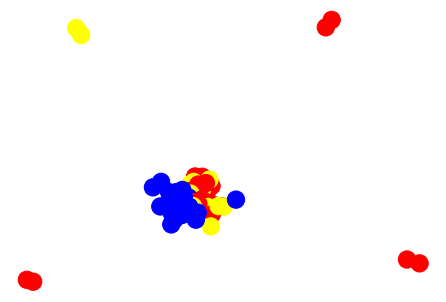

In [14]:
num_features = 100
salient_features = features.iloc[:,saliency_order[0:num_features]]
A = np.zeros((features.shape[0], features.shape[0]))
for i in features.index:
    for j in range(i):
        A[i,j] = np.linalg.norm(salient_features.iloc[i,:] - salient_features.iloc[j,:])
A = A + np.transpose(A)
# p = np.median(A).astype('int')
# print(np.max(A))
p = 1.3
A = (A < p)
A = A - np.eye(A.shape[0])
rows, cols = np.where(A==1)
edges = zip(rows.tolist(), cols.tolist())
G = nx.Graph()
G.add_edges_from(edges, node_size=1)
color_map = np.array([])
for node in G:
    if (class_label[node]==0):
        color_map = np.append(color_map, 'red')
    elif (class_label[node]==1):
        color_map = np.append(color_map, 'blue')
    else:
        color_map = np.append(color_map, 'yellow')
nx.draw(G, node_color=color_map)
plt.plot()

In [ ]:
print(p)

In [18]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(salient_features)
print(kmeans.inertia_)
# print(kmeans.cluster_centers_)
# print(kmeans.n_iter_)
predicted_label = kmeans.labels_
print(predicted_label)
print(classes)

163.98900416721065
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 2 2 1 1
 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0]
     adenoma  hyperplasic  serrated
0        1.0          0.0       0.0
1        1.0          0.0       0.0
2        1.0          0.0       0.0
3        1.0          0.0       0.0
4        1.0          0.0       0.0
..       ...          ...       ...
147      0.0          0.0       1.0
148      0.0          0.0       1.0
149      0.0          0.0       1.0
150      0.0          0.0       1.0
151      0.0          0.0       1.0

[152 rows x 3 columns]


In [19]:
print(kmeans.n_iter_)

9


In [11]:
compared_classes = np.array([])
for i in classes.iterrows():
    if i[1]['adenoma']==1:
        compared_classes = np.append(compared_classes, 1)
    elif i[1]['hyperplasic']==1:
        compared_classes = np.append(compared_classes, 0)
    else:
        compared_classes = np.append(compared_classes, 2)
print(np.count_nonzero(compared_classes==predicted_label)/len(predicted_label))
# print(i[1]['adenoma'])

0.75


[]

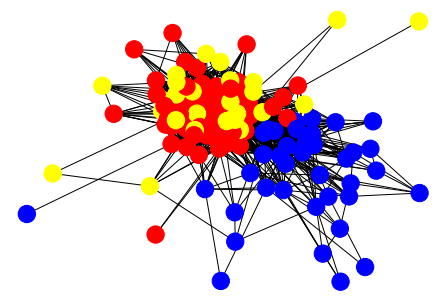

In [13]:
giant_component = G.subgraph(max(nx.connected_components(G), key=len))
color_map_GC = np.array([])
for node in giant_component:
    if (class_label[node]==0):
        color_map_GC = np.append(color_map_GC, 'red')
    elif (class_label[node]==1):
        color_map_GC = np.append(color_map_GC, 'blue')
    else:
        color_map_GC = np.append(color_map_GC, 'yellow')
nx.draw(giant_component, node_color=color_map_GC)
plt.plot()

[]

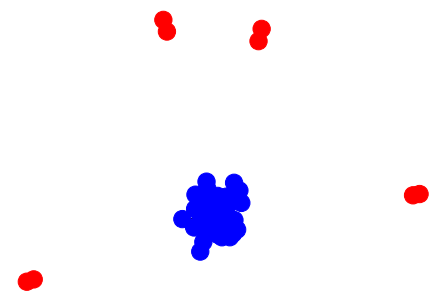

In [15]:
giant_component = G.subgraph(max(nx.connected_components(G), key=len))
color_map_GC = np.array([])
for node in G:
    if node in giant_component:
        color_map_GC = np.append(color_map_GC, 'blue')
    else:
        color_map_GC = np.append(color_map_GC, 'red')
nx.draw(G, node_color=color_map_GC)
plt.plot()

In [20]:
print(f"Density: {nx.density(giant_component)}")
print(f"Diameter: {nx.diameter(giant_component)}")
print(f"Radius: {nx.radius(giant_component)}")
print(f"Number Of Isolates: {nx.number_of_isolates(giant_component)}")
print(f"Average clustering value: {nx.average_clustering(giant_component)}")
print(f"Transitivity value: {nx.transitivity(giant_component)}")
print(f"Whether graph is connected: {nx.is_connected(giant_component)}")
print(f"Number of Connected Components: {nx.number_connected_components(giant_component)}")

Density: 0.314161220043573
Diameter: 4
Radius: 3
Number Of Isolates: 0
Average clustering value: 0.6833475883829461
Transitivity value: 0.6763222374947708
Whether graph is connected: True
Number of Connected Components: 1
